# Project 2 No-Show-Appointment 

## Motivation 

If someone gets sick or has a health issues he is usually thinking about doctor. Depends on where you live you don't need to have a appointment but normally patient need a appointment to meet doctor no matter your current symptoms is bad or not. However according to the US Study is found that up tp 30% of patients miss their appointments, and $150 billion is lost every year because of them. 


https://www.scisolutions.com/uploads/news/Missed-Appts-Cost-HMT-Article-042617.pdf (US Study)

## Question which we want to figure out in the end 

 - **Which factor is most important for us to know in order to predict if a patient will show up for their scheduled appointment ?**
 
 I'll answer about this question in the end of analyzing with my own opinion

## General information about dataset

This is really important step before you start to analyze the dataset. Because without any formal information about **each columns** you can't make a correct data cleaning, visualizing and  further prediction. 

So for that I used a Kaggle introduction to understand a each columns data https://www.kaggle.com/joniarroba/noshowappointments

- **01  PatientId** : Identification of a patient 

- **02  AppointmentID** : Identification of each appointment

- **03  Gender** : Male or Female

- **04 ScheduledDay** : The day of the actuall appointment, when they have to visit the doctor.

- **05 AppointmentDay** : The day someone called or registered the appointment, this is before appointment of course.

- **06  Age** : How old is patient  

- **07 Neighbourhood** : Where the appointment takes place.

- **08 Scholarship** : True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

- **09  Hipertension** : True or False

- **10  Diabetes** : True or False 

- **11 Alcoholism** : True or False

- **12 Handcap** : True or False

- **13 SMS_received** : 1 or more messages sent to the patient.

- **14 No-show** : True or False 

### 1. Import necessarily libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import warnings
warnings.filterwarnings('ignore')

### 2. load the dataset

In [8]:
noshowAppointment = pd.read_csv('noshowAppointment.csv') 

In [9]:
noshowAppointment.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [10]:
noshowAppointment.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### 3. Data cleaning

#### **Check-list** 

- Missing value
- Duplication 
- incorrect datatype
- statistical error
- column name

#### 3.1) Misssing value

In [11]:
noshowAppointment.isnull().sum()
# There is no missing value

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### 3.2) Duplication 

In [12]:
noshowAppointment.duplicated().sum()

0

No duplication 

#### 3.3) incorrect datatype

In [13]:
noshowAppointment.info()
# correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 3.4) Statistical error

In [18]:
noshowAppointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
wrong = noshowAppointment[noshowAppointment['Age']==-1] ; wrong

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


As you can see there is a negative age : minimum of age = -1.
So I'll drop out this row

In [20]:
noshowAppointment.drop([99832],inplace=True)

In [21]:
noshowAppointment[noshowAppointment['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


so now it's gone

#### 3.5) change the column name 

 - Hipertension is spanisch -> in english called **Hypertension**
 - Handcap -> **Handicap**

In [22]:
noshowAppointment.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)
noshowAppointment.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

### 4. split showing and no-showing 

In [23]:
noshow = noshowAppointment[noshowAppointment['No-show']=='Yes']
noshow.shape
noshow.to_csv('only_Noshow.csv',index=False)

In [24]:
noshow.to_csv('only_Noshow.csv',index=False)

So noshow data shows only no-show case.

Noshow data consists of **22319 rows and 14 columns**

### 5. Data Exploration 

#### 5.1 Gender comparision : number of No show 

personally i prefer to use seaborn rather than matplotlib. So i'll use seaborn to visualize

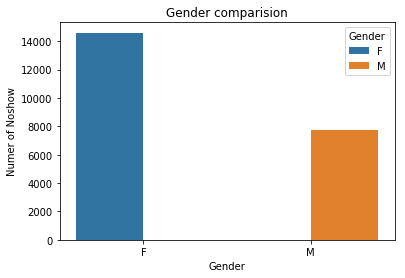

In [25]:
sns.countplot(x='Gender',data=noshow,hue='Gender')
plt.title("Gender comparision")
plt.ylabel('Numer of Noshow')
plt.show()

Female is noticeably more than men

To get more detail number of each gender : use **"value_counts()"**

In [26]:
noshow['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

#### 5.2) Gender Comparision : No show rate 

In [27]:
noshowAppointment.groupby(['Gender','No-show'])['No-show'].count()

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [28]:
noshowAppointment.groupby(['Gender','No-show'])['No-show'].count()[1] / sum(noshowAppointment.groupby(['Gender','No-show'])['No-show'].count()[0:2])

0.20314870752655242

In [29]:
noshowAppointment.groupby(['Gender','No-show'])['No-show'].count()[3] / sum(noshowAppointment.groupby(['Gender','No-show'])['No-show'].count()[2:4])

0.19967947889471915

Gender is not a important factor to predict the "No show situation".Because the rate of "No show" in each gender is almost same  (about 20%)

#### 5.3) Age distribution  

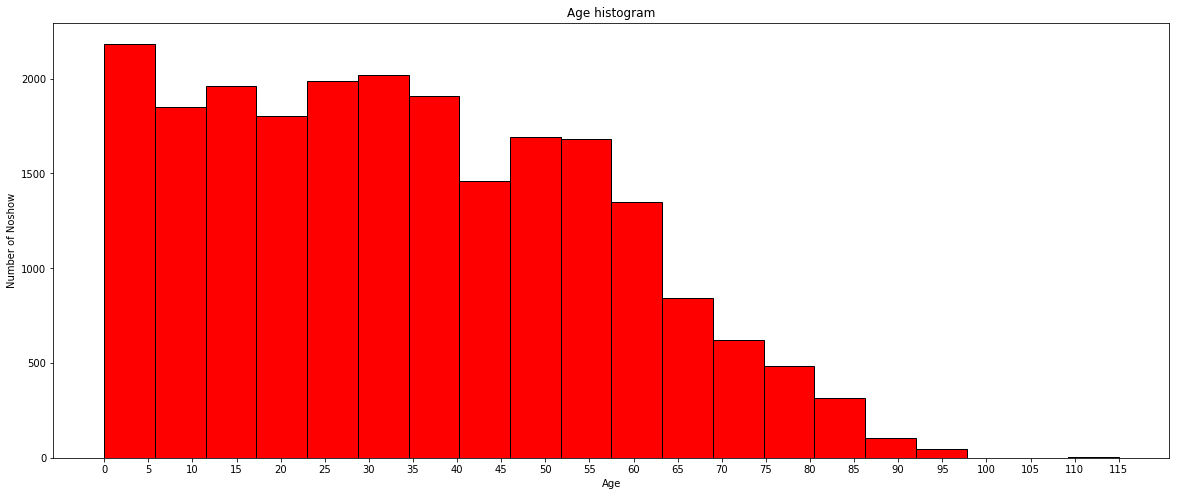

In [30]:
plt.subplots(figsize=(20,8))
plt.hist(x='Age',bins=20,data=noshow,edgecolor='black',color='red')
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Number of Noshow')
x1 = list(range(0,120,5))
plt.xticks(x1)
plt.show()

Personally I was really surprised that the number of no-show from 0 to 18 (Minors) is very high.So I tried how many people was absent and no-show rate of minors

In [31]:
noshow[noshow['Age']<=18].shape[0]

6347

In [32]:
noshow[noshow['Age']<=18].shape[0] / noshow['Age'].shape[0]

0.28437654016757025

About 6400 cases we have and that is 28% of noshow dataset. I'm going to guess that this is not a problem of themselves. It's because of their parent. Normally minor don't go to hospital alone. Their parent pay for them want it to know how is the current situation of thier childrens.

#### 5.4) Age distribution : Men vs Women

In this time I use diffrent code to present histogram

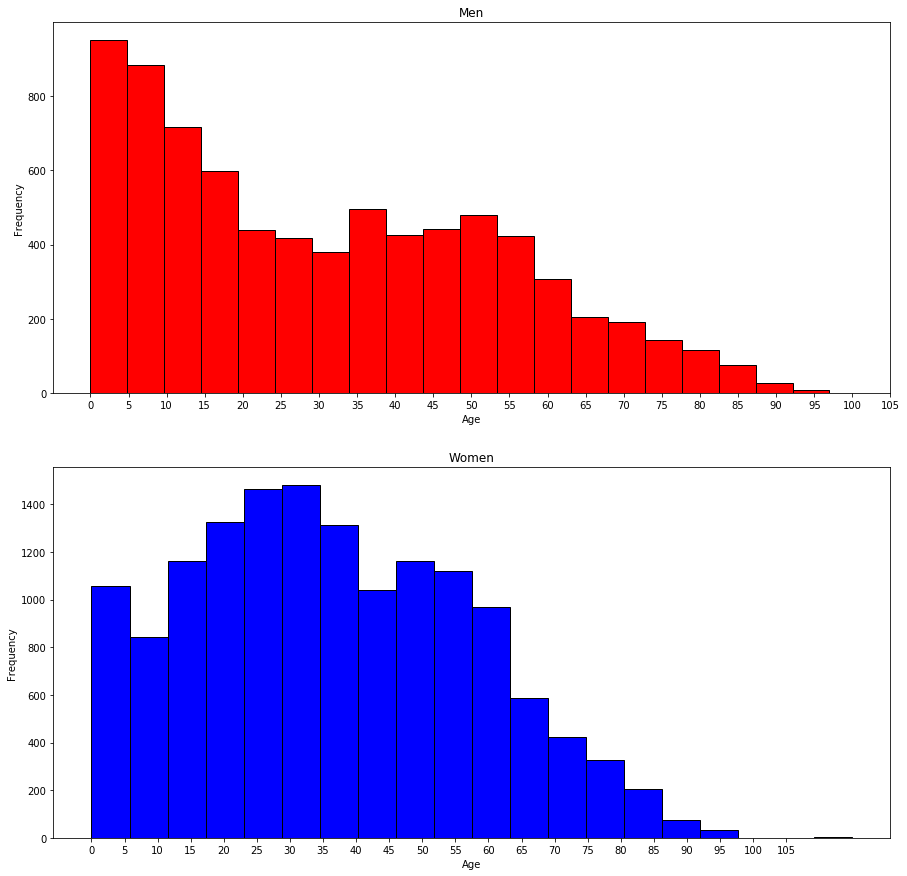

In [33]:
f,ax=plt.subplots(2,1,figsize=(15,15))
noshow[noshow['Gender']=='M'].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Men')
ax[0].set_xlabel('Age')
x1=list(range(0,110,5))
ax[0].set_xticks(x1)
noshow[noshow['Gender']=='F'].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Women')
ax[1].set_xlabel('Age')
x2=list(range(0,110,5))
ax[1].set_xticks(x2)
plt.show()

#### 5.5) counting of the No-Show (Month)

In [34]:
noshow['Month'] = noshow['ScheduledDay'].str[5:7]
noshow['Month'] = noshow['Month'].astype('int32')
noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Month
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,4
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,4
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,4


In [35]:
noshow['Month'].value_counts()

5     11769
4      7849
6      1386
3      1196
2        82
12       19
1        18
Name: Month, dtype: int64

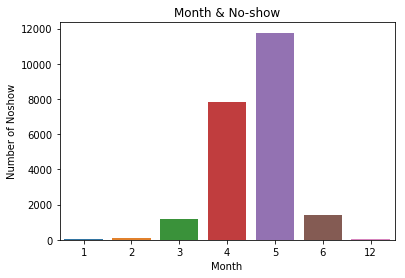

In [36]:
sns.countplot(x='Month',data=noshow)
plt.title("Month & No-show")
plt.ylabel('Number of Noshow')
plt.show()

#### 5.6) the hours of the No-Show

In [37]:
noshow['Hour'] = pd.to_datetime(noshow['ScheduledDay']).dt.hour
noshow['Minute'] = pd.to_datetime(noshow['ScheduledDay']).dt.minute
noshow['Second'] = pd.to_datetime(noshow['ScheduledDay']).dt.second
noshow['Count'] = 1
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Month,Hour,Minute,Second,Count
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,4,15,5,12,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,4,15,39,58,1
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,4,8,44,12,1
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes,4,9,28,57,1
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,4,7,51,14,1


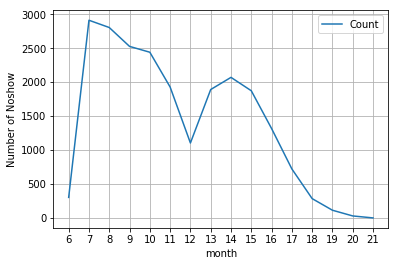

In [38]:
keys = [pair for pair, df in noshow.groupby(['Hour'])]

plt.plot(keys, noshow.groupby(['Hour']).count()['Count'])
plt.xlabel('month')
plt.ylabel('Number of Noshow')
plt.xticks(keys)
plt.legend()
plt.grid()
plt.show()

As you can see on the graph people miss their appointment early in the morinig like 7am to 9am. I guess people don't want to get up early and just miss their appointment with doctor.

#### 5.7) SMS & No-show

In [39]:
pd.DataFrame(noshowAppointment.groupby(['SMS_received','No-show'])['No-show'].count())

No-show
SMS_received No-show         
0            No         62509
             Yes        12535
1            No         25698
             Yes         9784

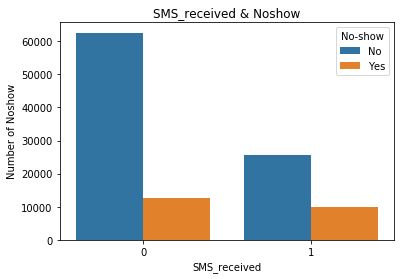

In [40]:
sns.countplot(x='SMS_received',hue='No-show',data=noshowAppointment)
plt.title("SMS_received & Noshow")
plt.ylabel('Number of Noshow')
plt.show()

#### 5.8) Probability of Showing up with given condition 

In [41]:
def Prob(condition): 
    return noshow[noshow[condition]==1].shape[0] /  noshow[condition].shape[0]

Prob('Diabetes')
Prob('Scholarship')
Prob('Handicap')
Prob('Alcoholism')
Prob('Hypertension')

0.16900398763385457

In [42]:
a = pd.DataFrame([Prob('Diabetes'),Prob('Scholarship'),Prob('Handicap'),Prob('Alcoholism'),Prob('Hypertension')])
a.rename(columns = {0: 'Probability'}, inplace = True)
a.rename(index={0:'Diabetes',1:'Scholarship',2:'Alcoholism',3:'Handicap',4:'Hypertension'})

,Probability
Diabetes,0.064071
Scholarship,0.115507
Alcoholism,0.016399
Handicap,0.030333
Hypertension,0.169004


Based on the not showing-up we can see that people who have Hypertension problem tend to highly **(about 17%)**  break the appointment from themselves.

### 6. Answer of the question which i mentioned the beginning of project and also fundamentally want to know 

Idea : Correlation & Heatmap 

We need correlation between noshow and another factors. But the problem is No-show columns is not integer type. Therefore we have to change the dataform 

- No -> 0 
- Yes -> 1 

In [43]:
noshowAppointment = noshowAppointment.replace(to_replace='No',value=0)
noshowAppointment = noshowAppointment.replace(to_replace='Yes',value=1)
noshowAppointment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 17.6+ MB


datatype of 'No-show' is now integer 

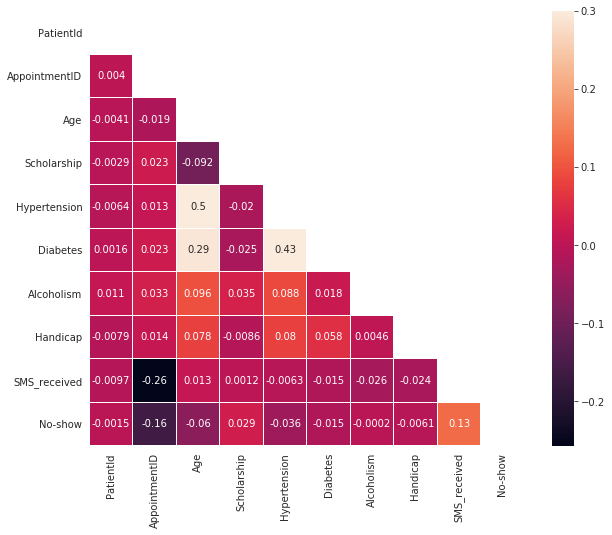

In [44]:
mask = np.zeros_like(noshowAppointment.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(noshowAppointment.corr(), mask=mask, vmax=.3, square=True,annot=True,linewidths=0.2)
plt.show()

- Correlation of Noshow with SMS_received shows the highst positive correlation  : 0.13 
- Correlation of Noshow with AppointmentID shows the highst negative correlation  : -0.16


# Conclusions

Clear limitation about each subsections

- Data cleaning : There were no missig data, no duplication and incorrect datatype. But there is a one statistical error which was Age = -1. Negative age is not existing.Beside some columns are written incorrect. Those errors which I figured out was fiexd 

- Data exploration 
   1. Number of No-show & Gender: Women(14594) > Men(7725)
   2. Rate of No-show & Gender : Women(20.3%) > Men (19.99)  , It's almost same 
   3. Age distribution : Right skewed 
   4. Month : May is the month, which was happened mostly
   5. Hours : Morning from 7 to 9 am was the timeframe ,which was happened mostly 
   6. SMS : There were 22319 cases that people didn't show up their appointment.From that 12535 cases didn't received any SMSs from doctor or hospital. It's about 56% which is very high 
   7. Personal Condition : Hypertension is a most relevant factor of not showing their appointment (aobut 17%)

- Question (Heatmap)
   - Positive correlation  : SMS & No-show shows the highest positive correlation (0.13)
   - Negative correlation : AppointmentID shows the negativest correlation (-0.16)